# Exploring Ensemble Methods

In [2]:
import pandas as pd

In [4]:
loans = pd.read_csv('data/lending-club-data.csv', low_memory=False)

In [5]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop(columns='bad_loans')

In [6]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]


In [7]:
print(len(loans))
loans = loans[[target] + features].dropna()
print(len(loans))

122607
122578


In [8]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder
categorical_variables = loans.select_dtypes(include=['object']).columns.tolist()
print(f"Variables categóricas identificadas: {categorical_variables}")
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_data = encoder.fit_transform(loans[categorical_variables])

feature_names = []
for i, feature in enumerate(categorical_variables):
    feature_vals = encoder.categories_[i]
    for val in feature_vals:
        feature_names.append(f"{feature}_{val}")

loans_cat = pd.DataFrame(encoded_data, columns=feature_names)
loans_num = loans.drop(columns=categorical_variables)
loans_cat.index=loans_num.index
loans = pd.concat([loans_cat, loans_num], axis=1)


Variables categóricas identificadas: ['grade', 'home_ownership', 'purpose']


In [44]:
features = loans.columns[loans.columns!='safe_loans'].tolist()


In [9]:
train_idx = pd.read_json('data/module-8-assignment-1-train-idx.json')
validation_idx = pd.read_json('data/module-8-assignment-1-validation-idx.json')

In [46]:
train_data = loans.iloc[train_idx[0].values]
validation_data = loans.iloc[validation_idx[0].values]

In [47]:
train_data

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,...,pub_rec,pub_rec_zero,revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,9.4,0.0,15.27,435.17,30000.0,2500,2500,59.83
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,32.6,0.0,21.28,294.94,40000.0,5600,5600,152.39
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,36.5,0.0,12.69,533.42,15000.0,5375,5350,121.45
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,91.7,0.0,13.49,570.26,30000.0,9000,9000,305.38
12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,55.5,0.0,10.65,1393.42,100000.0,10000,10000,325.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122577,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,48.0,0.0,7.90,333.45,37000.0,9000,9000,281.62
122588,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,34.4,0.0,8.90,103.84,150000.0,14000,14000,444.55
122589,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,69.8,0.0,13.98,2890.19,90000.0,24000,23800,558.19
122593,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,84.3,0.0,22.40,3034.68,70000.0,17000,17000,473.40


In [71]:
from sklearn.ensemble import GradientBoostingClassifier
X_train = train_data[features]
y_train = train_data[target]
model_5 = GradientBoostingClassifier(n_estimators=5,
    max_depth=6, random_state=0, learning_rate=0.3).fit(X_train, y_train)

In [49]:
X_train

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,...,pub_rec,pub_rec_zero,revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,9.4,0.0,15.27,435.17,30000.0,2500,2500,59.83
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,32.6,0.0,21.28,294.94,40000.0,5600,5600,152.39
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,36.5,0.0,12.69,533.42,15000.0,5375,5350,121.45
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,91.7,0.0,13.49,570.26,30000.0,9000,9000,305.38
12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,55.5,0.0,10.65,1393.42,100000.0,10000,10000,325.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122577,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,48.0,0.0,7.90,333.45,37000.0,9000,9000,281.62
122588,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,34.4,0.0,8.90,103.84,150000.0,14000,14000,444.55
122589,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,69.8,0.0,13.98,2890.19,90000.0,24000,23800,558.19
122593,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,84.3,0.0,22.40,3034.68,70000.0,17000,17000,473.40


In [51]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = pd.concat([sample_validation_data_safe, sample_validation_data_risky])
sample_validation_data

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,...,pub_rec,pub_rec_zero,revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment
22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,93.9,0.0,9.91,823.48,92000.0,15000,15000,483.38
26,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,59.1,0.0,11.71,1622.21,25000.0,8500,8500,281.15
24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,59.5,0.0,16.77,719.11,50004.0,5000,5000,123.65
41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,62.1,0.0,8.90,696.99,100000.0,5000,5000,158.77


In [72]:
model_5.predict(sample_validation_data[features])

array([ 1,  1, -1,  1])

In [53]:
sample_validation_data[target]

22    1
26    1
24   -1
41   -1
Name: safe_loans, dtype: int64

In [73]:
model_5.predict_proba(sample_validation_data[features])

array([[0.27462452, 0.72537548],
       [0.42610073, 0.57389927],
       [0.56257309, 0.43742691],
       [0.34386721, 0.65613279]])

In [74]:
model_5.score(validation_data[features], validation_data[target])

0.6665230504093064

In [75]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(validation_data[target],model_5.predict(validation_data[features]))

array([[3025, 1647],
       [1706, 2906]])

In [77]:
cost = 1647*20000 + 1706*10000
cost

50000000

In [78]:
predict_proba = model_5.predict_proba(validation_data[features])

In [82]:
validation_data['prediction'] = predict_proba[:,1]

/tmp/ipykernel_1463/1464107285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['prediction'] = predict_proba[:,1]


In [87]:
validation_data.sort_values('prediction', ascending=False)[0:5]

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,...,pub_rec_zero,revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment,prediction
8093,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.2,0.0,5.99,643.07,125000.0,10000,10000,304.18,0.827111
89215,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,40.3,0.0,6.62,659.18,150000.0,7000,7000,214.93,0.827111
17084,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,6.92,937.19,180000.0,8500,8500,262.15,0.827111
43517,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,18.9,0.0,6.03,815.00,130000.0,24000,24000,730.46,0.827111
2782,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,6.9,0.0,6.62,967.13,93000.0,12000,12000,368.45,0.827111


In [91]:
validation_data.sort_values('prediction', ascending=True)[0:5]

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,...,pub_rec_zero,revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment,prediction
4088,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,26.5,0.0000,16.29,0.00,27000.0,1500,1500,52.96,0.114686
84921,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,51.3,0.0000,16.29,0.00,36240.0,6400,6400,225.93,0.129903
51081,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,0.0000,15.88,0.00,27000.0,3975,3975,139.52,0.129903
27502,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,79.5,54.7090,14.22,492.33,45000.0,16000,16000,548.55,0.130420
37330,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,89.4,14.9987,13.87,426.33,75000.0,5000,299,170.58,0.132132


In [92]:
model_10=GradientBoostingClassifier(n_estimators=10,
    max_depth=6, random_state=0, learning_rate=0.3).fit(X_train, y_train)
model_50=GradientBoostingClassifier(n_estimators=50,
    max_depth=6, random_state=0, learning_rate=0.3).fit(X_train, y_train)
model_100=GradientBoostingClassifier(n_estimators=100,
    max_depth=6, random_state=0, learning_rate=0.3).fit(X_train, y_train)
model_200=GradientBoostingClassifier(n_estimators=200,
    max_depth=6, random_state=0, learning_rate=0.3).fit(X_train, y_train)
model_500=GradientBoostingClassifier(n_estimators=500,
    max_depth=6, random_state=0, learning_rate=0.3).fit(X_train, y_train)

In [93]:
model_10.score(validation_data[features], validation_data[target])

0.6742783283067644

In [94]:
model_50.score(validation_data[features], validation_data[target])

0.684080137871607

In [95]:
model_100.score(validation_data[features], validation_data[target])

0.6802024989228781

In [96]:
model_200.score(validation_data[features], validation_data[target])

0.677186557518311

In [97]:
model_500.score(validation_data[features], validation_data[target])

0.6740629039207239

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [104]:
model = [model_10, model_50, model_100, model_200, model_500]
training_errors = [1-i.score(train_data[features], train_data[target]) for i in model]

In [105]:
training_errors

[0.3061070958381472,
 0.23106477874204034,
 0.1805529433891292,
 0.11340981756629676,
 0.02106451006206511]

In [106]:
validation_errors = [1-i.score(validation_data[features], validation_data[target]) for i in model]

In [107]:
validation_errors

[0.3257216716932356,
 0.31591986212839296,
 0.3197975010771219,
 0.322813442481689,
 0.3259370960792761]

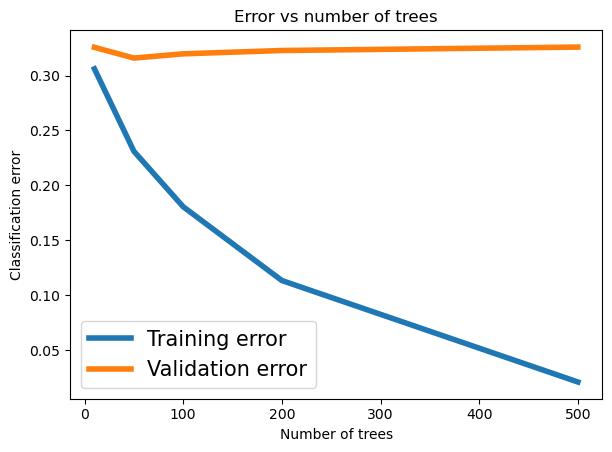

In [108]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')